# Ground truth Feature Effects

This notebook contains visualizations of the ground truth feature effects.

In [ ]:
from pathlib import Path
import yaml
import numpy as np
import matplotlib.pyplot as plt

from current_research_feature_effects.plotting.plots import plot_feature_effect_vs_groundtruth
from current_research_feature_effects.feature_effects import FeatureEffect
from current_research_feature_effects.mappings import map_dataset_to_groundtruth
from current_research_feature_effects.data_generating.data_generation import generate_data
from current_research_feature_effects.feature_effects import (
    compute_pdps,
    compute_ales,
    compute_theoretical_effects,
)

In [2]:
with open("../configs/datasets.yaml", "r") as file:
    datasets_config = yaml.safe_load(file)

groundtruths = [
    map_dataset_to_groundtruth(
        config["groundtruth"],
        [(v["marginal"]["type"], tuple(v["marginal"]["params"])) for v in config["features"].values()],
        np.array(config["correlation_matrix"]),
        feature_names=list(config["features"].keys()),
        name=name,
    )
    for name, config in datasets_config.items()
]

In [3]:
quantiles = np.linspace(0.0001, 0.9999, 100, endpoint=True)

## SimpleNormalCorrelated

In [4]:
groundtruth = groundtruths[0]

In [5]:
X_mc, y_mc, _, _ = generate_data(
    groundtruth=groundtruth,
    n_train=10000,
    n_test=1,
    snr=1,
    seed=42,
)

In [6]:
feature_names = groundtruth.feature_names
grid_values = [groundtruth.get_theoretical_quantiles(feature, quantiles) for feature in feature_names]

In [7]:
pdp_groundtruth_theoretical = compute_theoretical_effects(
    groundtruth, "pdp", feature_names, grid_values=grid_values, center_curves=True, remove_first_last=True
)
ale_groundtruth_theoretical = compute_theoretical_effects(
    groundtruth, "ale", feature_names, grid_values=grid_values, center_curves=True, remove_first_last=True
)

In [8]:
pdp_groundtruth_mc = compute_pdps(
    groundtruth, X_mc, feature_names, grid_values=grid_values, center_curves=True, remove_first_last=True
)
ale_groundtruth_mc = compute_ales(
    groundtruth, X_mc, feature_names, grid_values=grid_values, center_curves=True, remove_first_last=True
)

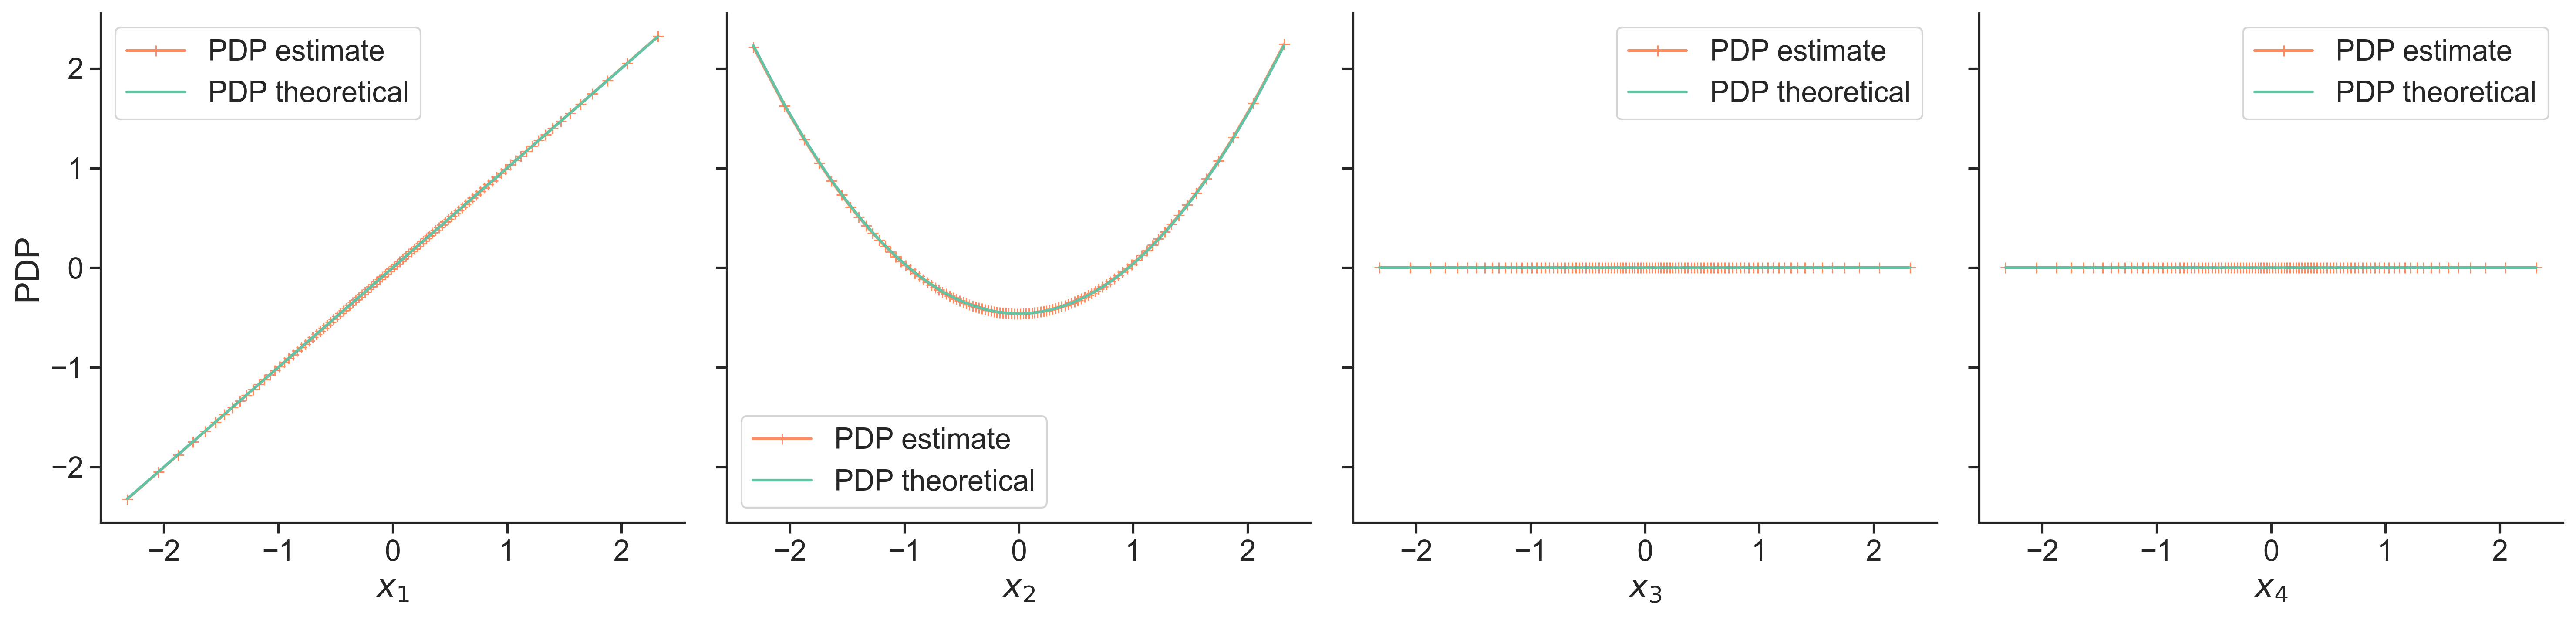

In [ ]:
fig = plot_feature_effect_vs_groundtruth(
    pdp_groundtruth_mc,
    pdp_groundtruth_theoretical,
    feature_names,
    large_font=True,
    # save_figs=Path("../paper/img/SNC-all/")
)
plt.show()

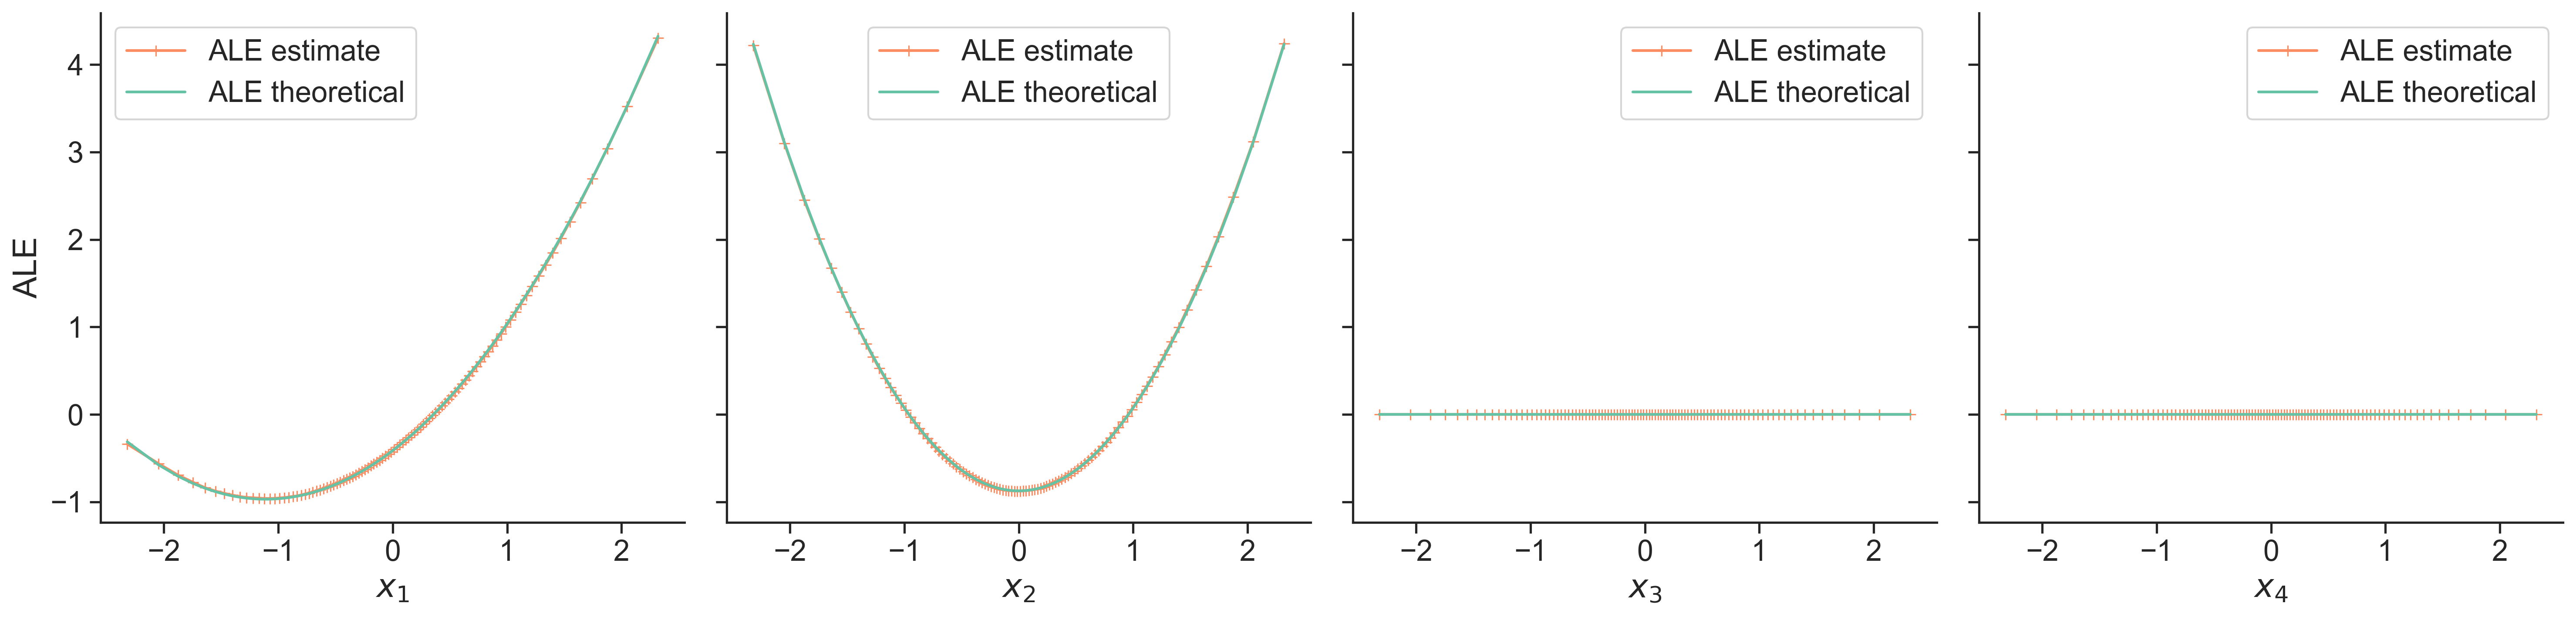

In [ ]:
fig = plot_feature_effect_vs_groundtruth(
    ale_groundtruth_mc,
    ale_groundtruth_theoretical,
    feature_names,
    large_font=True,
    # save_figs=Path("../paper/img/SNC-all/")
)
plt.show()

## Friedman1

In [11]:
groundtruth = groundtruths[1]

In [12]:
X_mc, y_mc, _, _ = generate_data(
    groundtruth=groundtruth,
    n_train=10000,
    n_test=1,
    snr=1,
    seed=42,
)

C:\Users\ti-he\OneDrive\Dokumente\Master-Studium\3. Semester\Current Research\current-research-feature-effects\current_research_feature_effects\data_generating\data_generation.py:228: UserWarning: Correlations > 0 may not be preserved by the transformation (distribution: uniform).
  warnings.warn(


In [13]:
feature_names = groundtruth.feature_names
grid_values = [groundtruth.get_theoretical_quantiles(feature, quantiles) for feature in feature_names]

In [14]:
pdp_groundtruth_theoretical = compute_theoretical_effects(
    groundtruth, "pdp", feature_names, grid_values=grid_values, center_curves=True, remove_first_last=True
)
ale_groundtruth_theoretical = compute_theoretical_effects(
    groundtruth, "ale", feature_names, grid_values=grid_values, center_curves=True, remove_first_last=True
)

In [15]:
pdp_groundtruth_mc = compute_pdps(
    groundtruth, X_mc, feature_names, grid_values=grid_values, center_curves=True, remove_first_last=True
)
ale_groundtruth_mc = compute_ales(
    groundtruth, X_mc, feature_names, grid_values=grid_values, center_curves=True, remove_first_last=True
)

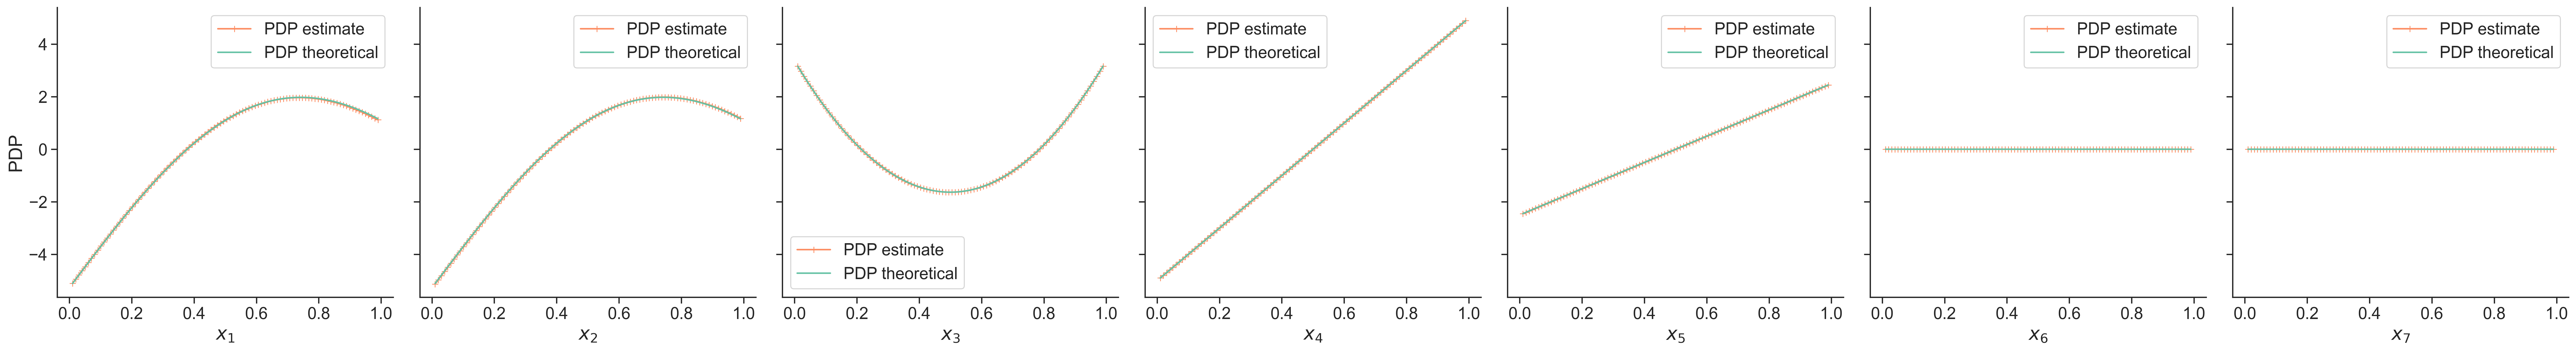

In [ ]:
fig = plot_feature_effect_vs_groundtruth(
    pdp_groundtruth_mc,
    pdp_groundtruth_theoretical,
    feature_names,
    large_font=True,
    # save_figs=Path("../paper/img/Friedman1-all/")
)
plt.show()

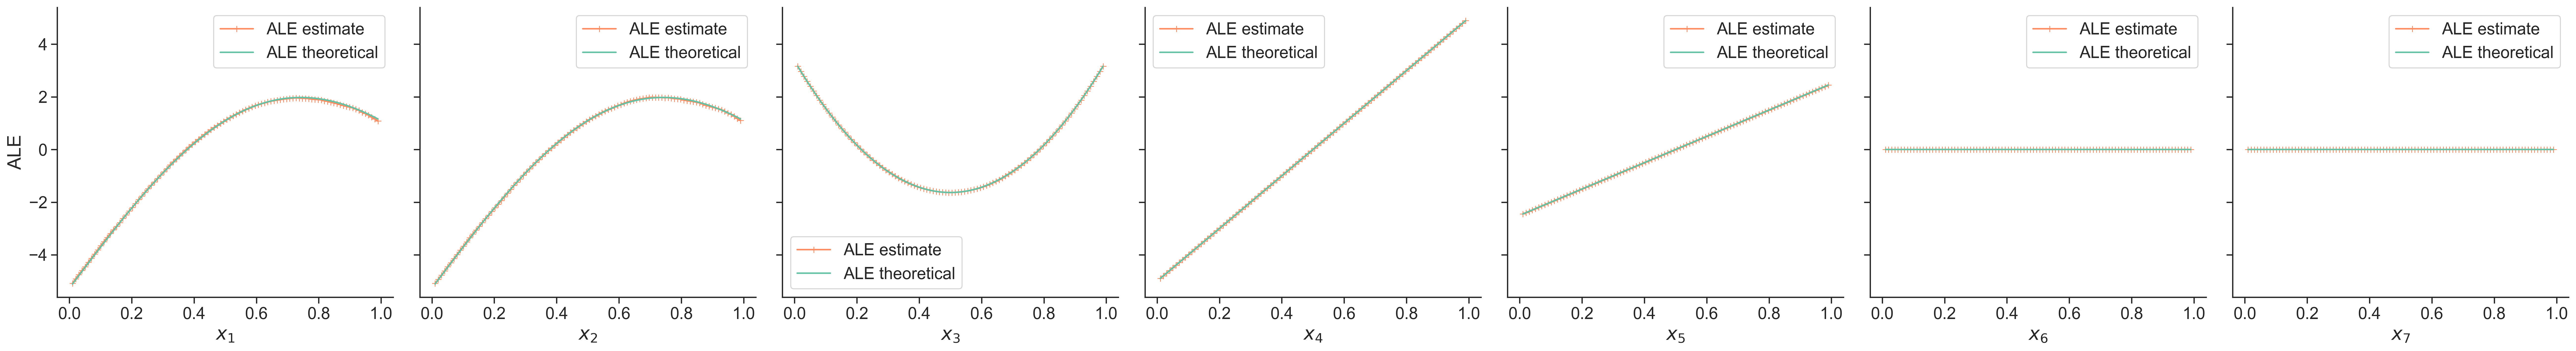

In [ ]:
fig = plot_feature_effect_vs_groundtruth(
    ale_groundtruth_mc,
    ale_groundtruth_theoretical,
    feature_names,
    large_font=True,
    # save_figs=Path("../paper/img/Friedman1-all/")
)
plt.show()

## FeynmanI.29.16

In [24]:
groundtruth = groundtruths[2]

In [25]:
X_mc, y_mc, _, _ = generate_data(
    groundtruth=groundtruth,
    n_train=10000,
    n_test=1,
    snr=1,
    seed=42,
)

C:\Users\ti-he\OneDrive\Dokumente\Master-Studium\3. Semester\Current Research\current-research-feature-effects\current_research_feature_effects\data_generating\data_generation.py:235: UserWarning: Correlations > 0 may not be preserved by the transformation (distribution: loguniform).
  warnings.warn(
C:\Users\ti-he\OneDrive\Dokumente\Master-Studium\3. Semester\Current Research\current-research-feature-effects\current_research_feature_effects\data_generating\data_generation.py:228: UserWarning: Correlations > 0 may not be preserved by the transformation (distribution: uniform).
  warnings.warn(


In [26]:
feature_names = groundtruth.feature_names
grid_values = [groundtruth.get_theoretical_quantiles(feature, quantiles) for feature in feature_names]

In [27]:
pdp_groundtruth_mc = compute_pdps(
    groundtruth, X_mc, feature_names, grid_values=grid_values, center_curves=True, remove_first_last=True
)
ale_groundtruth_mc = compute_ales(
    groundtruth, X_mc, feature_names, grid_values=grid_values, center_curves=True, remove_first_last=True
)

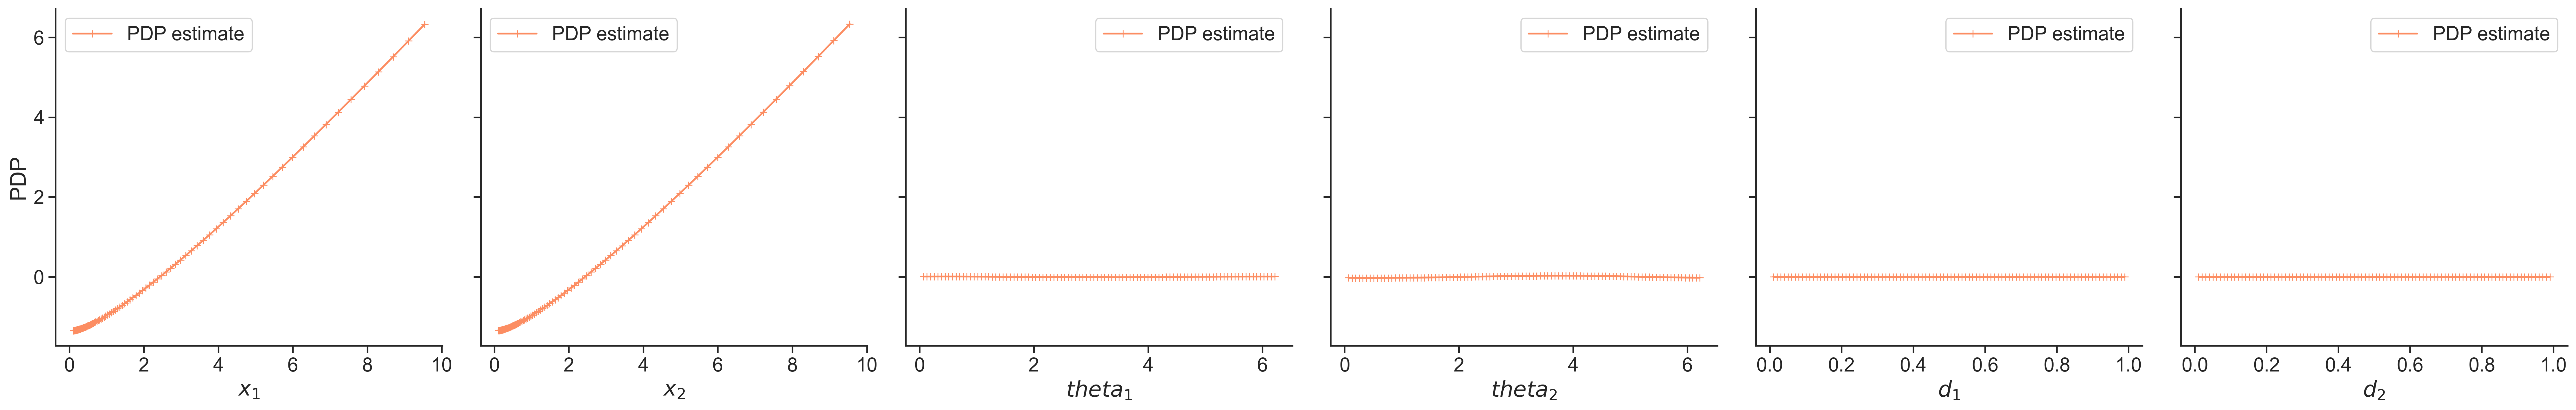

In [ ]:
fig = plot_feature_effect_vs_groundtruth(
    pdp_groundtruth_mc,
    FeatureEffect(
        effect_type="pdp",
        feature_effects=[{"feature": feature, "grid_values": [], "effect": []} for feature in feature_names],
    ),  # no theoretical effects for this dataset
    feature_names,
    large_font=True,
    # save_figs=Path("../paper/img/FeynmanI.29.16-all/")
)
plt.show()

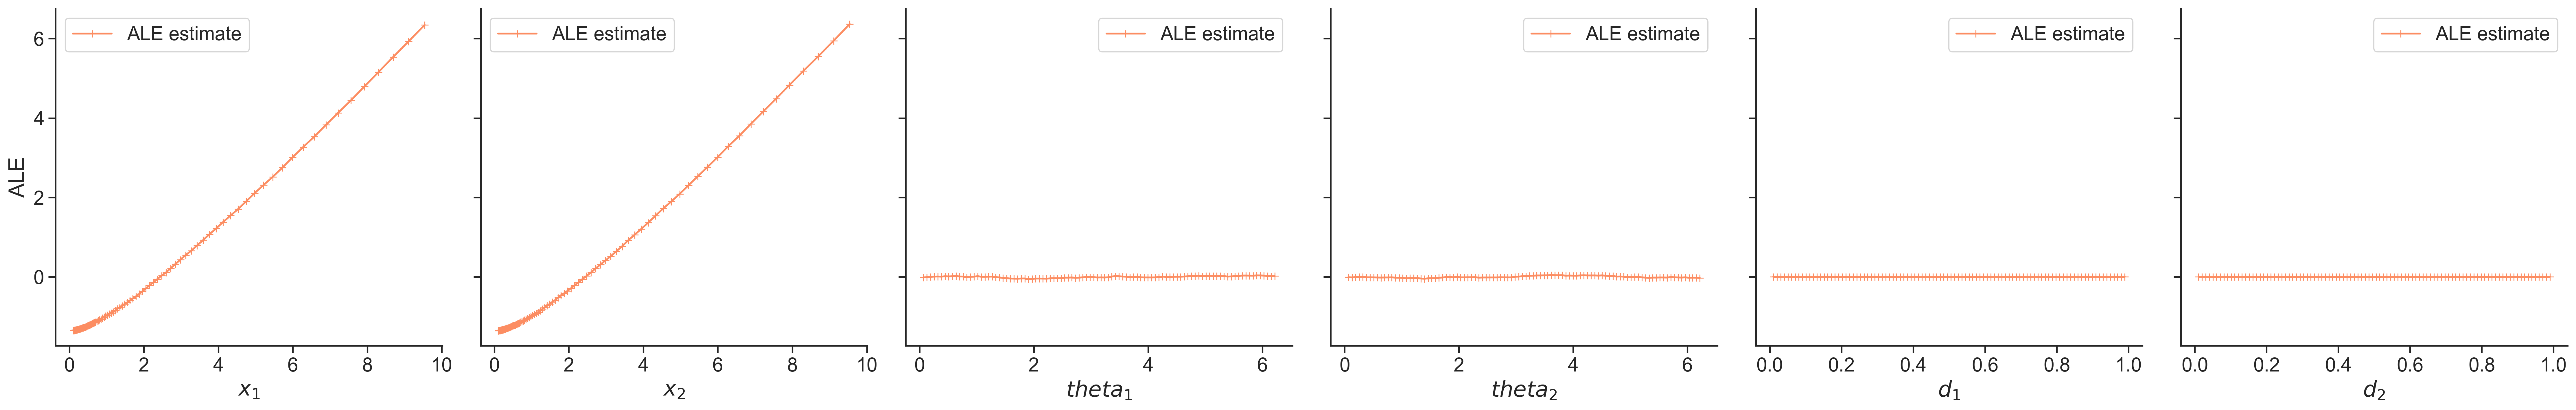

In [ ]:
fig = plot_feature_effect_vs_groundtruth(
    ale_groundtruth_mc,
    FeatureEffect(
        effect_type="ale",
        feature_effects=[{"feature": feature, "grid_values": [], "effect": []} for feature in feature_names],
    ),  # no theoretical effects for this dataset
    feature_names,
    large_font=True,
    # save_figs=Path("../paper/img/FeynmanI.29.16-all/")
)
plt.show()